In [1]:
import networkx as nx
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def SerieToNetMod(serie):
    arrG1=[]
    G=nx.Graph()
    for Na in range (len(serie)):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,len(serie)):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)
            if slp > maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
                
    
    for i in range(len(serie)):
        G.add_node(i, y=serie[i])
                                    
    G.add_edges_from(arrG1)
    
    return(G)
            

In [3]:
def genConway(N):
    conway=[0,1,1]
    test=[]
    for n in range(3,N):
        an=conway[conway[n-1]]+conway[n-conway[n-1]]
        conway.append(an)
        test.append(an-n/2)
    test=np.array(test)
    return(test)

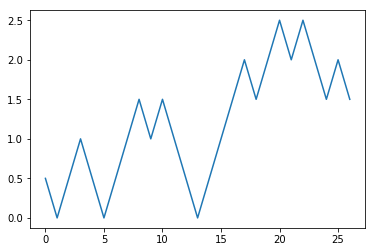

In [6]:
s1=genConway(30)
plt.plot(s1)

In [ ]:
for i in range(10):
    for nn in testlist:
#         nn=n*10000
        serie=genConway(nn)
        start=time.time()
        SerieToNetMod(serie)
        stop=time.time()-start
        print(nn,stop)

5000 6.298184394836426
10000 25.32316017150879
15000 55.94028878211975
20000 99.40793561935425
25000 155.95180439949036
30000 219.8261821269989
35000 310.80633544921875
40000 401.79659700393677
45000 504.4447982311249
50000 618.4227027893066
55000 751.0676612854004
60000 889.4090507030487
65000 1049.138279914856
70000 1222.7797977924347
5000 6.38438081741333
10000 25.35666251182556
15000 56.01795816421509
20000 99.93444204330444
25000 154.39187788963318
30000 224.6155879497528
35000 307.3796901702881
40000 403.94441413879395
45000 502.53868222236633
50000 623.342919588089
55000 755.18856549263
60000 886.0829646587372
65000 1037.8962833881378
70000 1213.121402978897
5000 6.742533445358276
10000 26.94061279296875
15000 56.023608684539795
20000 100.39766526222229
25000 153.32029128074646
30000 220.68094563484192
35000 303.79623436927795
40000 400.426340341568
45000 500.3447608947754
50000 622.9927108287811
55000 742.6133990287781
60000 893.9982147216797
65000 1032.9845662117004
70000 1226

In [ ]:
10000 6.889946222305298
20000 27.73611879348755
30000 60.45446252822876
40000 113.55506610870361
50000 169.21544456481934
60000 240.0815863609314
70000 332.15484404563904
10000 7.053157329559326
20000 29.14527726173401
30000 64.2561776638031
40000 118.6770715713501
50000 183.00755834579468
60000 261.72470903396606
70000 368.9904954433441
10000 6.892658233642578
20000 27.528230905532837
30000 59.96904444694519
40000 114.79736280441284
50000 175.13248372077942
60000 241.75383138656616
70000 338.52379274368286
80000 460.2236819267273
10000 7.486508369445801
20000 29.014439582824707
30000 66.27562165260315
40000 116.6788284778595
50000 185.21788215637207
60000 258.0574643611908
70000 361.63682532310486
80000 490.26600909233093
10000 7.0062150955200195
20000 29.44119691848755
30000 66.82088160514832
40000 121.15778470039368
50000 186.68399477005005
60000 265.58406019210815
70000 365.2519850730896
80000 498.70740389823914
10000 7.214072227478027
20000 27.79825234413147
30000 62.387160539627075
40000 124.18154859542847
50000 184.88979077339172
60000 271.76423716545105
70000 370.7518992424011
80000 491.03151988983154
10000 7.8069727420806885
20000 30.21127152442932
30000 64.56060314178467
40000 124.11601638793945
50000 184.69579911231995
60000 260.4434735774994
70000 364.1939790248871
80000 495.4496705532074
10000 7.315354347229004
20000 28.826387405395508
30000 63.54474663734436
40000 117.43325901031494
50000 174.30548858642578
60000 257.3843445777893
70000 350.2301592826843
80000 476.6626446247101
10000 7.880614280700684
20000 29.770437002182007
30000 68.16804313659668
40000 121.37983465194702
50000 186.4519340991974
60000 262.7703185081482
70000 361.3711767196655
10000 7.739222526550293
20000 29.629257202148438
30000 66.68456482887268
40000 121.51537203788757
50000 185.11415123939514
60000 263.67985367774963
70000 375.41712975502014

In [4]:
serie=genConway(100)

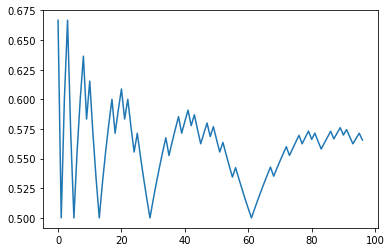

In [9]:
plt.plot(serie)

In [7]:
def maxlist(series,lista,index):
    if len(series)==0:
        lista.append((len(series)-1,series))
        
        return lista[:-1]
    else: 
        max_index=np.argmax(series)
        lista.append([max_index+index,np.max(series)])
        index=max_index+1+index
#         print(lista)
        return maxlist(series[max_index+1:],lista, index)



In [9]:
def streamingVN(serie,window):
    arrG1=[]
    G=nx.Graph()
    numcalls=0
    for Na in range (window):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,window):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
            if slp > maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
#                print(Na,Nb)
                
    
    for i in range(window):
        G.add_node(i, y=serie[i])
                                    
    G.add_edges_from(arrG1)
 

    #  Here we start adding nodes

    maxs= maxlist(serie[:window],[],0)
    pointer=1

#     print('................................')
#     print(maxs)
    for Na in range(window,len(serie)):
        
        ya = serie[Na]
        lim=0
        maxslp=1000
        for maxim in maxs[::-1]:
            if maxim[1]>ya:
                lim=maxim[0]
        
        for Nb in range(Na,lim-1,-1):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)  
#             print(Na,Nb,slp,lim)
            if slp < maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
#                 print(Na,Nb)

        if lim==0:
            numcalls=numcalls+1
            maxs=maxlist(serie[pointer:pointer+window+1],[],pointer)
#             print('///////////////maxlist nueva')
#             print(maxs)

        else:
                
                
            for m in maxs[::-1]:
                if ya>=m[1]:
                    maxs.remove(m)
#                     print('remove '+str(m))
                else:
#                     print('entra else')
                    yb=m[1]
                    Nb=m[0]
                    slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
#                     print(Na,Nb,slp,maxslp)
                    if slp < maxslp:
                        arrG1.append((Na,Nb))
#                         print(Na,Nb)
                        maxslp=slp
            maxs.append([Na,ya])
#             print('---------maxlist actualizada')
#             print(maxs)
                
            pointer=pointer+1
                

        
    G.add_edges_from(arrG1)
    
    return(G,numcalls)
            

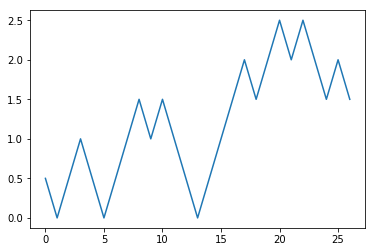

In [13]:
s1=genConway(30)
plt.plot(s1)

In [14]:
G1=SerieToNetMod(s1)
G1.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (6, 7), (7, 8), (8, 9), (8, 10), (8, 17), (8, 20), (9, 10), (10, 11), (10, 14), (10, 15), (10, 16), (10, 17), (10, 20), (11, 12), (11, 14), (11, 15), (11, 16), (11, 17), (12, 13), (12, 14), (12, 15), (12, 16), (12, 17), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (17, 19), (17, 20), (18, 19), (19, 20), (20, 21), (20, 22), (21, 22), (22, 23), (22, 25), (23, 24), (23, 25), (24, 25), (25, 26)])

In [15]:
s1

array([0.5, 0. , 0.5, 1. , 0.5, 0. , 0.5, 1. , 1.5, 1. , 1.5, 1. , 0.5,
       0. , 0.5, 1. , 1.5, 2. , 1.5, 2. , 2.5, 2. , 2.5, 2. , 1.5, 2. ,
       1.5])

(array([17631., 14385., 15151.,  6762., 14123.,  7846.,  2971.,  3689.,
         4280., 13169.]),
 array([   0.  ,  353.05,  706.1 , 1059.15, 1412.2 , 1765.25, 2118.3 ,
        2471.35, 2824.4 , 3177.45, 3530.5 ]),
 <a list of 10 Patch objects>)

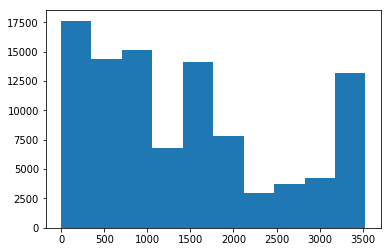

In [28]:
s2=genConway(100010)    
    
plt.hist(s2)

In [12]:
testlist=[n*5000 for n in range(1,15)]

In [ ]:
for i in range(10):
    for n in testlist:
        
#         serie=genConway(n)
        serie=genConway(n)
        start=time.time()
        G,numcalls=streamingVN(serie,100)
        stop=time.time()-start
        print(n,stop,numcalls)

/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


5000 7.518783092498779 4404
10000 27.244079113006592 9238
15000 59.51151990890503 14238
20000 106.09739136695862 19033
25000 165.16809558868408 24033
30000 237.44896268844604 29033
35000 323.2542972564697 33870
40000 435.95174264907837 38870
45000 539.6147217750549 43870
50000 663.4976894855499 48870
55000 789.0640125274658 53870
60000 933.9550144672394 58870
65000 1139.3280899524689 63870
70000 1326.89821600914 68624
5000 8.623201370239258 4404
10000 27.36962342262268 9238
15000 59.01347756385803 14238
20000 106.15876770019531 19033
25000 164.97792959213257 24033
30000 236.31778240203857 29033
35000 321.2207136154175 33870
40000 423.0722918510437 38870
45000 528.2900421619415 43870
50000 651.9029769897461 48870
55000 778.1909868717194 53870
60000 924.6933033466339 58870
65000 1081.747083902359 63870
70000 1261.9378654956818 68624
5000 8.498633623123169 4404
10000 26.779613256454468 9238
15000 58.69591188430786 14238
20000 109.43421912193298 19033
25000 173.0504903793335 24033
30000 24

In [ ]:
5000 0.5777034759521484
10000 1.578502893447876
15000 2.5600569248199463
20000 4.142356634140015

In [ ]:
10000 6.889946222305298
20000 27.73611879348755
30000 60.45446252822876
40000 113.55506610870361
50000 169.21544456481934
60000 240.0815863609314
70000 332.15484404563904
10000 7.053157329559326
20000 29.14527726173401
30000 64.2561776638031
40000 118.6770715713501
50000 183.00755834579468
60000 261.72470903396606
70000 368.9904954433441
10000 6.892658233642578
20000 27.528230905532837
30000 59.96904444694519
40000 114.79736280441284
50000 175.13248372077942
60000 241.75383138656616
70000 338.52379274368286
80000 460.2236819267273
10000 7.486508369445801
20000 29.014439582824707
30000 66.27562165260315
40000 116.6788284778595
50000 185.21788215637207
60000 258.0574643611908
70000 361.63682532310486
80000 490.26600909233093
10000 7.0062150955200195
20000 29.44119691848755
30000 66.82088160514832
40000 121.15778470039368
50000 186.68399477005005
60000 265.58406019210815
70000 365.2519850730896
80000 498.70740389823914
10000 7.214072227478027
20000 27.79825234413147
30000 62.387160539627075
40000 124.18154859542847
50000 184.88979077339172
60000 271.76423716545105
70000 370.7518992424011
80000 491.03151988983154
10000 7.8069727420806885
20000 30.21127152442932
30000 64.56060314178467
40000 124.11601638793945
50000 184.69579911231995
60000 260.4434735774994
70000 364.1939790248871
80000 495.4496705532074
10000 7.315354347229004
20000 28.826387405395508
30000 63.54474663734436
40000 117.43325901031494
50000 174.30548858642578
60000 257.3843445777893
70000 350.2301592826843
80000 476.6626446247101
10000 7.880614280700684
20000 29.770437002182007
30000 68.16804313659668
40000 121.37983465194702
50000 186.4519340991974
60000 262.7703185081482
70000 361.3711767196655
10000 7.739222526550293
20000 29.629257202148438
30000 66.68456482887268
40000 121.51537203788757
50000 185.11415123939514
60000 263.67985367774963
70000 375.41712975502014

In [ ]:
5000 7.507204294204712
10000 29.34574031829834
15000 63.662774324417114
20000 116.58383202552795
25000 180.53791165351868
30000 251.98630332946777
35000 349.37782740592957
40000 460.4690396785736
45000 576.7803800106049